In [245]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.externals import joblib

In [246]:
df = pd.read_csv("data/recipe_1_out_balec.csv", index_col=0)

In [277]:
val = pd.read_csv("data/val_rec1.csv", index_col=0)

## Mean model

In [44]:
cols_to_fit = ['sifter_speed_nominal_pct', 'water_correction', 'steam_preasure', 'dd_speed', 'temp_out', 
               'water_pct', 'steam_pres_avg', 'steam_pres_min',
      'steam_pres_max', 'prod_temp_jetcooker_avg', 'prod_temp_jetcooker_min',
      'prod_temp_jetcooker_max', 'prod_temp_avg', 'prod_temp_min',
      'prod_temp_max', 'steam_pres_jetcooker_avg', 'steam_pres_jetcooker_min',
      'steam_pres_jetcooker_max', 'cond_temp_avg', 'cond_temp_min',
      'cond_temp_max', 'particles_grp1', 'particles_grp2', 'particles_grp3', 'moisture', 'elems']

In [45]:
df_train = df.loc[df['id'] < 17]
df_test=  df.loc[df['id'] > 18]

In [46]:
df = df.dropna()

In [47]:
for col in cols_to_fit:
    print(df_train[col].mean(), df_train[col].std(), df_test[col].mean(), col)

1.0 0.0 1.0 sifter_speed_nominal_pct
-42.7930174563591 6.646769976627333 -40.0 water_correction
6.633665835411471 0.47459327645349425 6.25909090909091 steam_preasure
9.663341645885287 0.5701997943583322 10.265151515151516 dd_speed
122.92768079800499 3.0663099741962423 120.6969696969697 temp_out
0.6599999999999999 1.111609937126711e-16 0.6599999999999999 water_pct
4.524742859004762 3.069018693717344 6.070784635488227 steam_pres_avg
4.466812892038924 3.0402912945516483 5.982728016195876 steam_pres_min
4.574100133412497 3.0990427939221346 6.142321988037138 steam_pres_max
85.83696486602572 39.969549614222444 98.22220582589075 prod_temp_jetcooker_avg
83.6296857443831 40.13092170613519 95.36580790895411 prod_temp_jetcooker_min
87.53913097904807 40.32542788300746 100.9258154377793 prod_temp_jetcooker_max
88.75290729500257 39.866210872060066 101.17636737422497 prod_temp_avg
86.61979627728165 40.14092069647466 99.33804026517006 prod_temp_min
90.2713751852364 40.09093132000048 103.19519256822991

## Regresja liniowa

In [919]:
cols_to_fit = ['sifter_speed_nominal_pct', 'water_correction', 'steam_preasure', 'dd_speed', 'temp_out', 
               'water_pct', 'steam_pres_avg', 'steam_pres_min',
      'steam_pres_max', 'prod_temp_jetcooker_avg', 'prod_temp_jetcooker_min',
      'prod_temp_jetcooker_max', 'prod_temp_avg', 'prod_temp_min',
      'prod_temp_max', 'steam_pres_jetcooker_avg', 'steam_pres_jetcooker_min',
      'steam_pres_jetcooker_max', 'cond_temp_avg', 'cond_temp_min',
      'cond_temp_max',
              'fat_pct', 'particles_grp1', 'particles_grp2', 'particles_grp3', 'moisture', 'elems']

In [260]:
cols_to_fit = ['sifter_speed_nominal_pct', 'dd_speed',  'particles_grp1',
              'particles_grp2', 'particles_grp3', 'moisture', 'water_correction']

In [57]:
df_train = df.loc[df['id'] < 17]
df_test=  df.loc[df['id'] > 17]

In [58]:
for col in cols_to_fit:
    print(df_train[col].mean(), df_train[col].std(), df_test[col].mean(), col)

1.0 0.0 1.0 sifter_speed_nominal_pct
9.663341645885287 0.5701997943583322 10.223684210526315 dd_speed
0.7294817182044888 0.07936758451214762 0.6414274999999999 particles_grp1
0.2705132942643392 0.07942159941837734 0.35844092105263164 particles_grp2
0.0 0.0 0.0 particles_grp3
12.342500748129677 0.4397765643192449 12.548289473684212 moisture
3.718204488778055 1.1148510071214899 2.1973684210526314 elems
-42.7930174563591 6.646769976627333 -40.26315789473684 water_correction


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import sklearn
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [62]:
rf = RandomForestRegressor(n_estimators=10, max_depth=1, min_samples_split=3,
                           min_samples_leaf=2)

In [63]:
xgb = xgboost.XGBRegressor(booster='gbtree')

In [134]:
svr = SVR(gamma="auto",kernel="linear", C=200, degree=4)

In [135]:
lr = LinearRegression()

In [136]:
df['class'] = df['class'].astype('category').cat.codes

In [137]:
xgb.fit(df_train[cols_to_fit], df_train['efficiency'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [138]:
svr.fit(df[cols_to_fit], df['class'])

SVR(C=200, cache_size=200, coef0=0.0, degree=4, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [235]:
rf = RandomForestRegressor(n_estimators=100, max_depth=3, max_features=4)

In [261]:
svr.fit(df_train[cols_to_fit], df_train['efficiency'])
rf.fit(df[cols_to_fit], df['efficiency'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [262]:
#df['preds_stack'] = (lr.predict_proba(df[cols_to_fit]) + rf.predict_proba(df[cols_to_fit])).argmax(axis=1)
df['preds'] =  (rf.predict(df[cols_to_fit]))

In [263]:
df['class'] = df_test['class'].astype('category').cat.codes

In [264]:
df['class_preds'] = np.where(df['preds'] < 98, 0, np.where(df['preds'] > 110, 2, 1))
df['class'] = np.where(df['efficiency'] < 98, 0, np.where(df['efficiency'] > 110, 2, 1))

In [265]:
df_train = df.loc[df['id'] < 17]
df_test=  df.loc[df['id'] > 17]

In [266]:
(df_train['class'] == df_train['class_preds']).mean()

0.8479809976247031

In [267]:
(df_test['class'] == df_test['class_preds']).mean()

0.7407407407407407

In [268]:
from sklearn.metrics import confusion_matrix

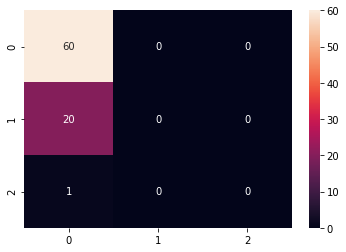

In [269]:
sns.heatmap(confusion_matrix(df_test['class'], df_test['class_preds']),annot=True )

In [ ]:
df_train['efficiency']

In [282]:
val['efficiency'] = rf.predict(val[cols_to_fit])

In [275]:
val[['orders_details_id_x', 'bigbag_number', 'efficiency']].to_csv("val_1_eff.csv")

In [279]:
rf.predict(val[cols_to_fit]).shape

(84,)

In [283]:
val[['orders_details_id_x', 'bigbag_number', 'efficiency']]

,orders_details_id_x,bigbag_number,efficiency
540,22,1,87.018453
541,22,2,87.018453
542,22,3,87.077165
543,22,4,87.077165
544,22,5,87.077165
545,22,6,87.077165
546,22,7,87.077165
547,22,8,87.077165
548,22,9,87.077165
549,22,10,87.077165
